### Calculating TRBI 

In [1]:
import numpy as np 
import scipy as sp 
from datetime import datetime 
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io.netcdf as netcdf 
import matplotlib.cm as cm
from netCDF4 import Dataset
import cmocean
import warnings
warnings.filterwarnings("ignore")
get_ipython().magic(u'matplotlib inline')
%config InlineBackend.figure_format ='retina'  
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.optimize import minimize
from numpy import exp
import pandas as pd


In [2]:
#define directories
datadir = '/Volumes/Maxtor/phdresearch/cmip5'
plotoutdir = '/Volumes/Maxtor/phdresearch/chirpsdata/'


In [3]:
### Define time           
now = datetime.now()
currentmn = str(now.month)
currentdy = str(now.day)
currentyr = str(now.year)
currenttime = currentmn + '_' + currentdy + '_' + currentyr
titletime = currentmn + '/' + currentdy + '/' + currentyr
print('\n' '----Constructing TRBI using method from Grisha - %s----' % titletime) 


----Constructing TRBI using method from Grisha - 2/11/2019----


#### Load dataset

In [4]:
nc = datadir + 'trbi_chirps-v2.0_1981-2017_africa_mon_p25_lonlat_zonmean.nc'
fh = Dataset(nc, mode='r')


# Read variables and close the file
lon = fh.variables['lon'][:] 
lat = fh.variables['lat'][:] 
pr = fh.variables['precip'][:]
ntime = fh.variables['time'][:]
fh.close()

In [5]:
print(fh.dimensions.keys())

[u'time', u'lon', u'lat']


#### Plot data variable 

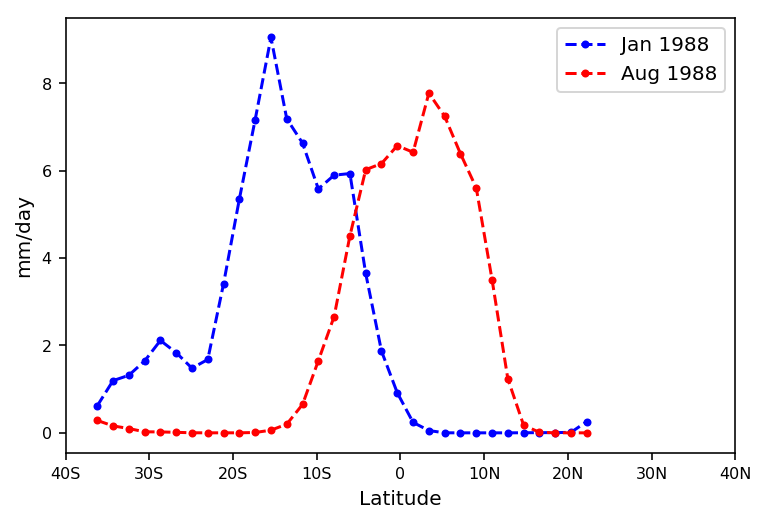

In [6]:
plt.plot(pr[84,1:35], 'bo--',markersize=3)    #,linestyle='--') January 1988
plt.plot(pr[91,1:35], 'ro--',markersize=3)    #,linestyle='--') August 1988
x = ['40S','30S','20S','10S','0','10N','20N','30N','40N']
xi = [i * 5.3 for i in range(0, len(x))]
plt.xticks(xi, x,fontsize='8')
plt.yticks(fontsize='8')
plt.xlabel('Latitude')
plt.ylabel('mm/day') 
plt.legend(('Jan 1988','Aug 1988'),loc= 'best')    #'upper right')
plt.show()
#plt.xticks(x,fontsize='4') 
#plt.xticks([i * 10 for i in range(-5, 5)])

#### Define Gaussian Function

In [7]:
def gaussfit(fitparams, fixedparams):
    _m, _sd, _scale = fitparams
    _temp, _lats=fixedparams
    y=_scale*exp(-(_lats-_m)**2/(2*_sd**2))
    return np.mean((_temp-y)**2)

lats=range(-40,42,2)[3:35]



#### Fit the data 

In [8]:
trbi=[]
for i in range(0,433):
    precip=np.ma.filled(pr[i,3:35,0])
    results=minimize(gaussfit, [2, 2.4, 8], [precip[:], lats])
    trbi=trbi+[results.x]

In [9]:
print (trbi[12])

[-9.27650796  7.60991433  8.38525145]


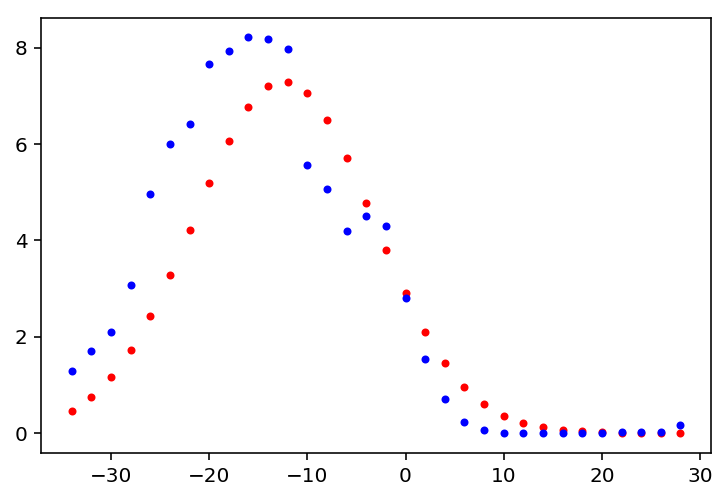

In [10]:
mean, sd, scale=trbi[1]
y=scale*exp(-(lats-mean)**2/(2*sd**2))
plt.plot(lats, y, 'ro',markersize=3)
plt.plot(lats, precip, 'bo',markersize=3)
plt.show()

#### Convert to dataframe and write to csv

In [25]:
dataset = pd.DataFrame(trbi)
dataset.columns = ['Location', 'Width', 'Intensity']
dataset.to_csv('trbi_kwesi_a.csv')
print(dataset)

      Location      Width  Intensity
0   -10.498438   8.926454   7.194786
1   -12.431192   9.137189   7.303563
2    -6.284902   9.081531   7.935761
3    -1.589287   6.157953   6.261931
4     2.511672   5.093980   6.955125
5     5.601195   4.876467   5.837407
6     7.186452   5.279078   7.889055
7     4.891573   6.103583   7.857143
8     3.534887   6.199139   8.862998
9     0.202296   6.724053   7.901984
10   -4.684509   7.918504   6.321063
11   -6.873142   6.025024   7.331301
12   -9.276508   7.609914   8.385251
13  -10.522641   7.188969   8.171063
14   -5.169447   7.740993   6.086051
15   -2.999464   7.290131   6.399086
16    2.047019   5.365103   7.345775
17    4.219155   4.887900   6.573520
18    6.308489   5.084498   6.114809
19    5.722825   6.298674   6.505580
20    3.478808   6.134464   7.892951
21   -0.320160   7.491456   8.448696
22   -7.301380   7.266955   8.717195
23   -8.533036   6.735504   8.478435
24  -11.052044   7.296686   7.354908
25   -9.003337   7.362434   6.398089
2

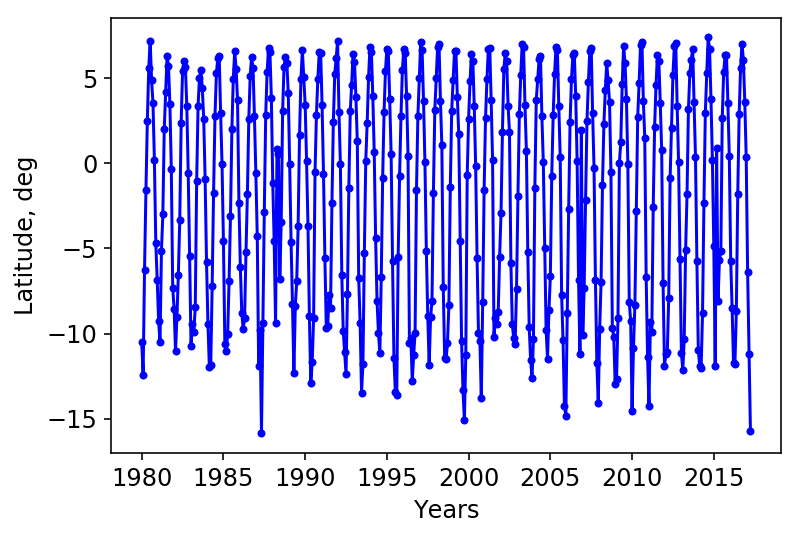

In [13]:
dataset = pd.DataFrame(trbi)
dataset.columns = ['Location', 'Width', 'Intensity']
plt.plot(dataset['Location'], 'bo-',markersize=3)
x = range(1980,2018,5)
xi = [i * 58 for i in range(0, len(x))]
plt.xticks(xi, x,fontsize='12')
plt.yticks(fontsize='12')
plt.xlabel('Years',fontsize='12')
plt.ylabel('Latitude, deg',fontsize='12') 
plt.show()

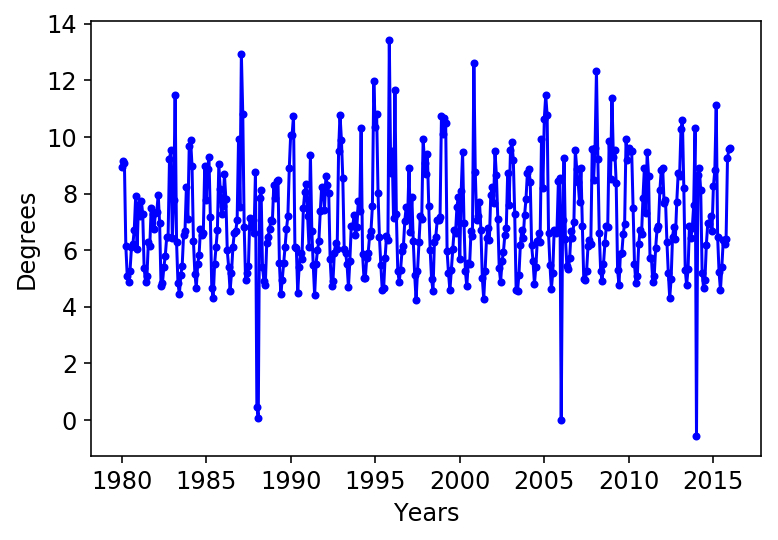

In [14]:
plt.plot(dataset['Width'], 'bo-',markersize=3)
x = range(1980,2018,5)
xi = [i * 60 for i in range(0, len(x))]
plt.xticks(xi, x,fontsize='12')
plt.yticks(fontsize='12')
plt.xlabel('Years',fontsize='12')
plt.ylabel('Degrees',fontsize='12') 
plt.show()

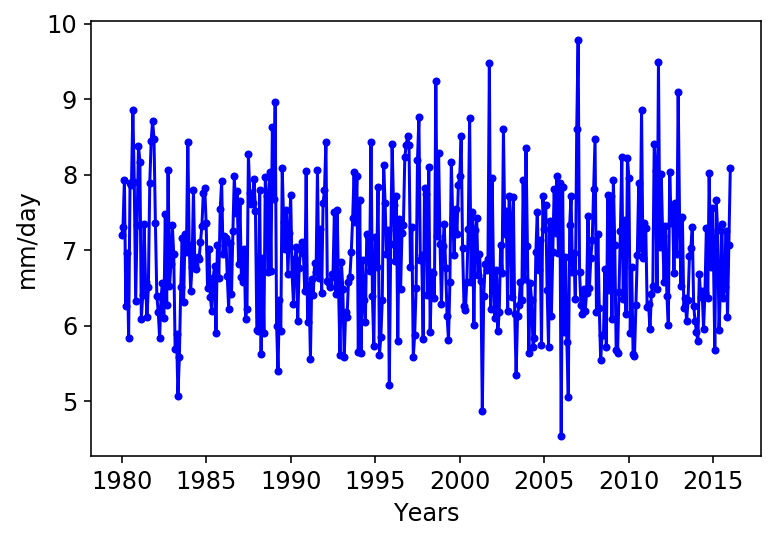

In [15]:
plt.plot(dataset['Intensity'], 'bo-',markersize=3)
x = range(1980,2018,5)
xi = [i * 60 for i in range(0, len(x))]
plt.xticks(xi, x,fontsize='12')
plt.yticks(fontsize='12')
plt.xlabel('Years',fontsize='12')
plt.ylabel('mm/day',fontsize='12') 
plt.show()

In [16]:
location = dataset['Location']
width = dataset['Width']
intensity = dataset['Intensity']

In [ ]:
ncdataset=Dataset('TRBI_kwesi_07-11-18_b.nc', "w", format='NETCDF4_CLASSIC')
ncdataset.createDimension('lon', len(lon))
ncdataset.createDimension('lat', len(lat))
longitudes = ncdataset.createVariable('lon',np.float32, ('lon',))
latitudes  = ncdataset.createVariable('lat',np.float32, ('lat',))
longitudes[:]=lon[:]
latitudes[:]=lat[:]
var1=ncdataset.createVariable('location',np.float32,('lat', 'lon',))
var2=ncdataset.createVariable('width',np.float32,('lat', 'lon',))
var3=ncdataset.createVariable('intensity',np.float32,('lat', 'lon',))
var1[:,:]=dataset['Location']
var2[:,:]=dataset['Width']
var3[:,:]=dataset['Intensity']
ncdataset.close()

In [ ]:
print('\n' '----Thanks for waiting! - %s----' % titletime)